# Accelerometer Filter

Select designs for the lowpass filter for the individual accelerometer signals.

- IIR generic 1st order
- Butterworth 2nd order
- ARMA 5th order
  - used internally on the SensorTile, to match future implementation

Using Dec 30, 2023 data since only 2 runs registered (easy).

In [1]:
from load import load_2023_12_30
from signal_processing import mean, variance, std, length, lowpass
import numpy as np
import matplotlib.pyplot as plt

a50_2023_12_30, a50_all_2023_12_30, f6p_2023_12_30, tile_2023_12_30_runs = load_2023_12_30()

A50 Downhill Tracks
	 Track type Downhill | Date 2023-12-30 | Time 12:06:29 | Duration [s] 115 | Length [m] 977
	 Track type Downhill | Date 2023-12-30 | Time 12:18:53 | Duration [s] 114 | Length [m] 1032
	 Track type Downhill | Date 2023-12-30 | Time 12:21:47 | Duration [s] 40 | Length [m] 111
A50 All Tracks
	 Track type Hold | Date 2023-12-30 | Time 11:52:15 | Duration [s] 110 | Length [m] 36
	 Track type Walk | Date 2023-12-30 | Time 11:54:05 | Duration [s] 103 | Length [m] 56
	 Track type Hold | Date 2023-12-30 | Time 11:55:48 | Duration [s] 74 | Length [m] 22
	 Track type Walk | Date 2023-12-30 | Time 11:57:02 | Duration [s] 82 | Length [m] 53
	 Track type Lift | Date 2023-12-30 | Time 11:58:24 | Duration [s] 485 | Length [m] 862
	 Track type Downhill | Date 2023-12-30 | Time 12:06:29 | Duration [s] 115 | Length [m] 977
	 Track type Walk | Date 2023-12-30 | Time 12:08:24 | Duration [s] 92 | Length [m] 75
	 Track type Lift | Date 2023-12-30 | Time 12:09:56 | Duration [s] 410 | Leng

### Sync & Split Tile into runs

In [2]:
print('Run count:', len(tile_2023_12_30_runs))
run1 = tile_2023_12_30_runs[0]
run2 = tile_2023_12_30_runs[1]

Run count: 3


## Raw vs Filtered

Skiing has some pretty quick motions, especially in slalom racing. However, completing fast turns down a hill is nowhere near as fast as sprinting- which is ~10Hz motion. Therfore, start with a fc of 10Hz

- fs = 100Hz
- fc = variable by filter!

The cutoff frequency was qualitatively selected, and will be explored at the final stage of this notebook once an appropriate filter is selected. For now, 5Hz and 2Hz work well for the IIR1 and Butter2 filters and show reasonable representation to eachother in terms of magnitudes.


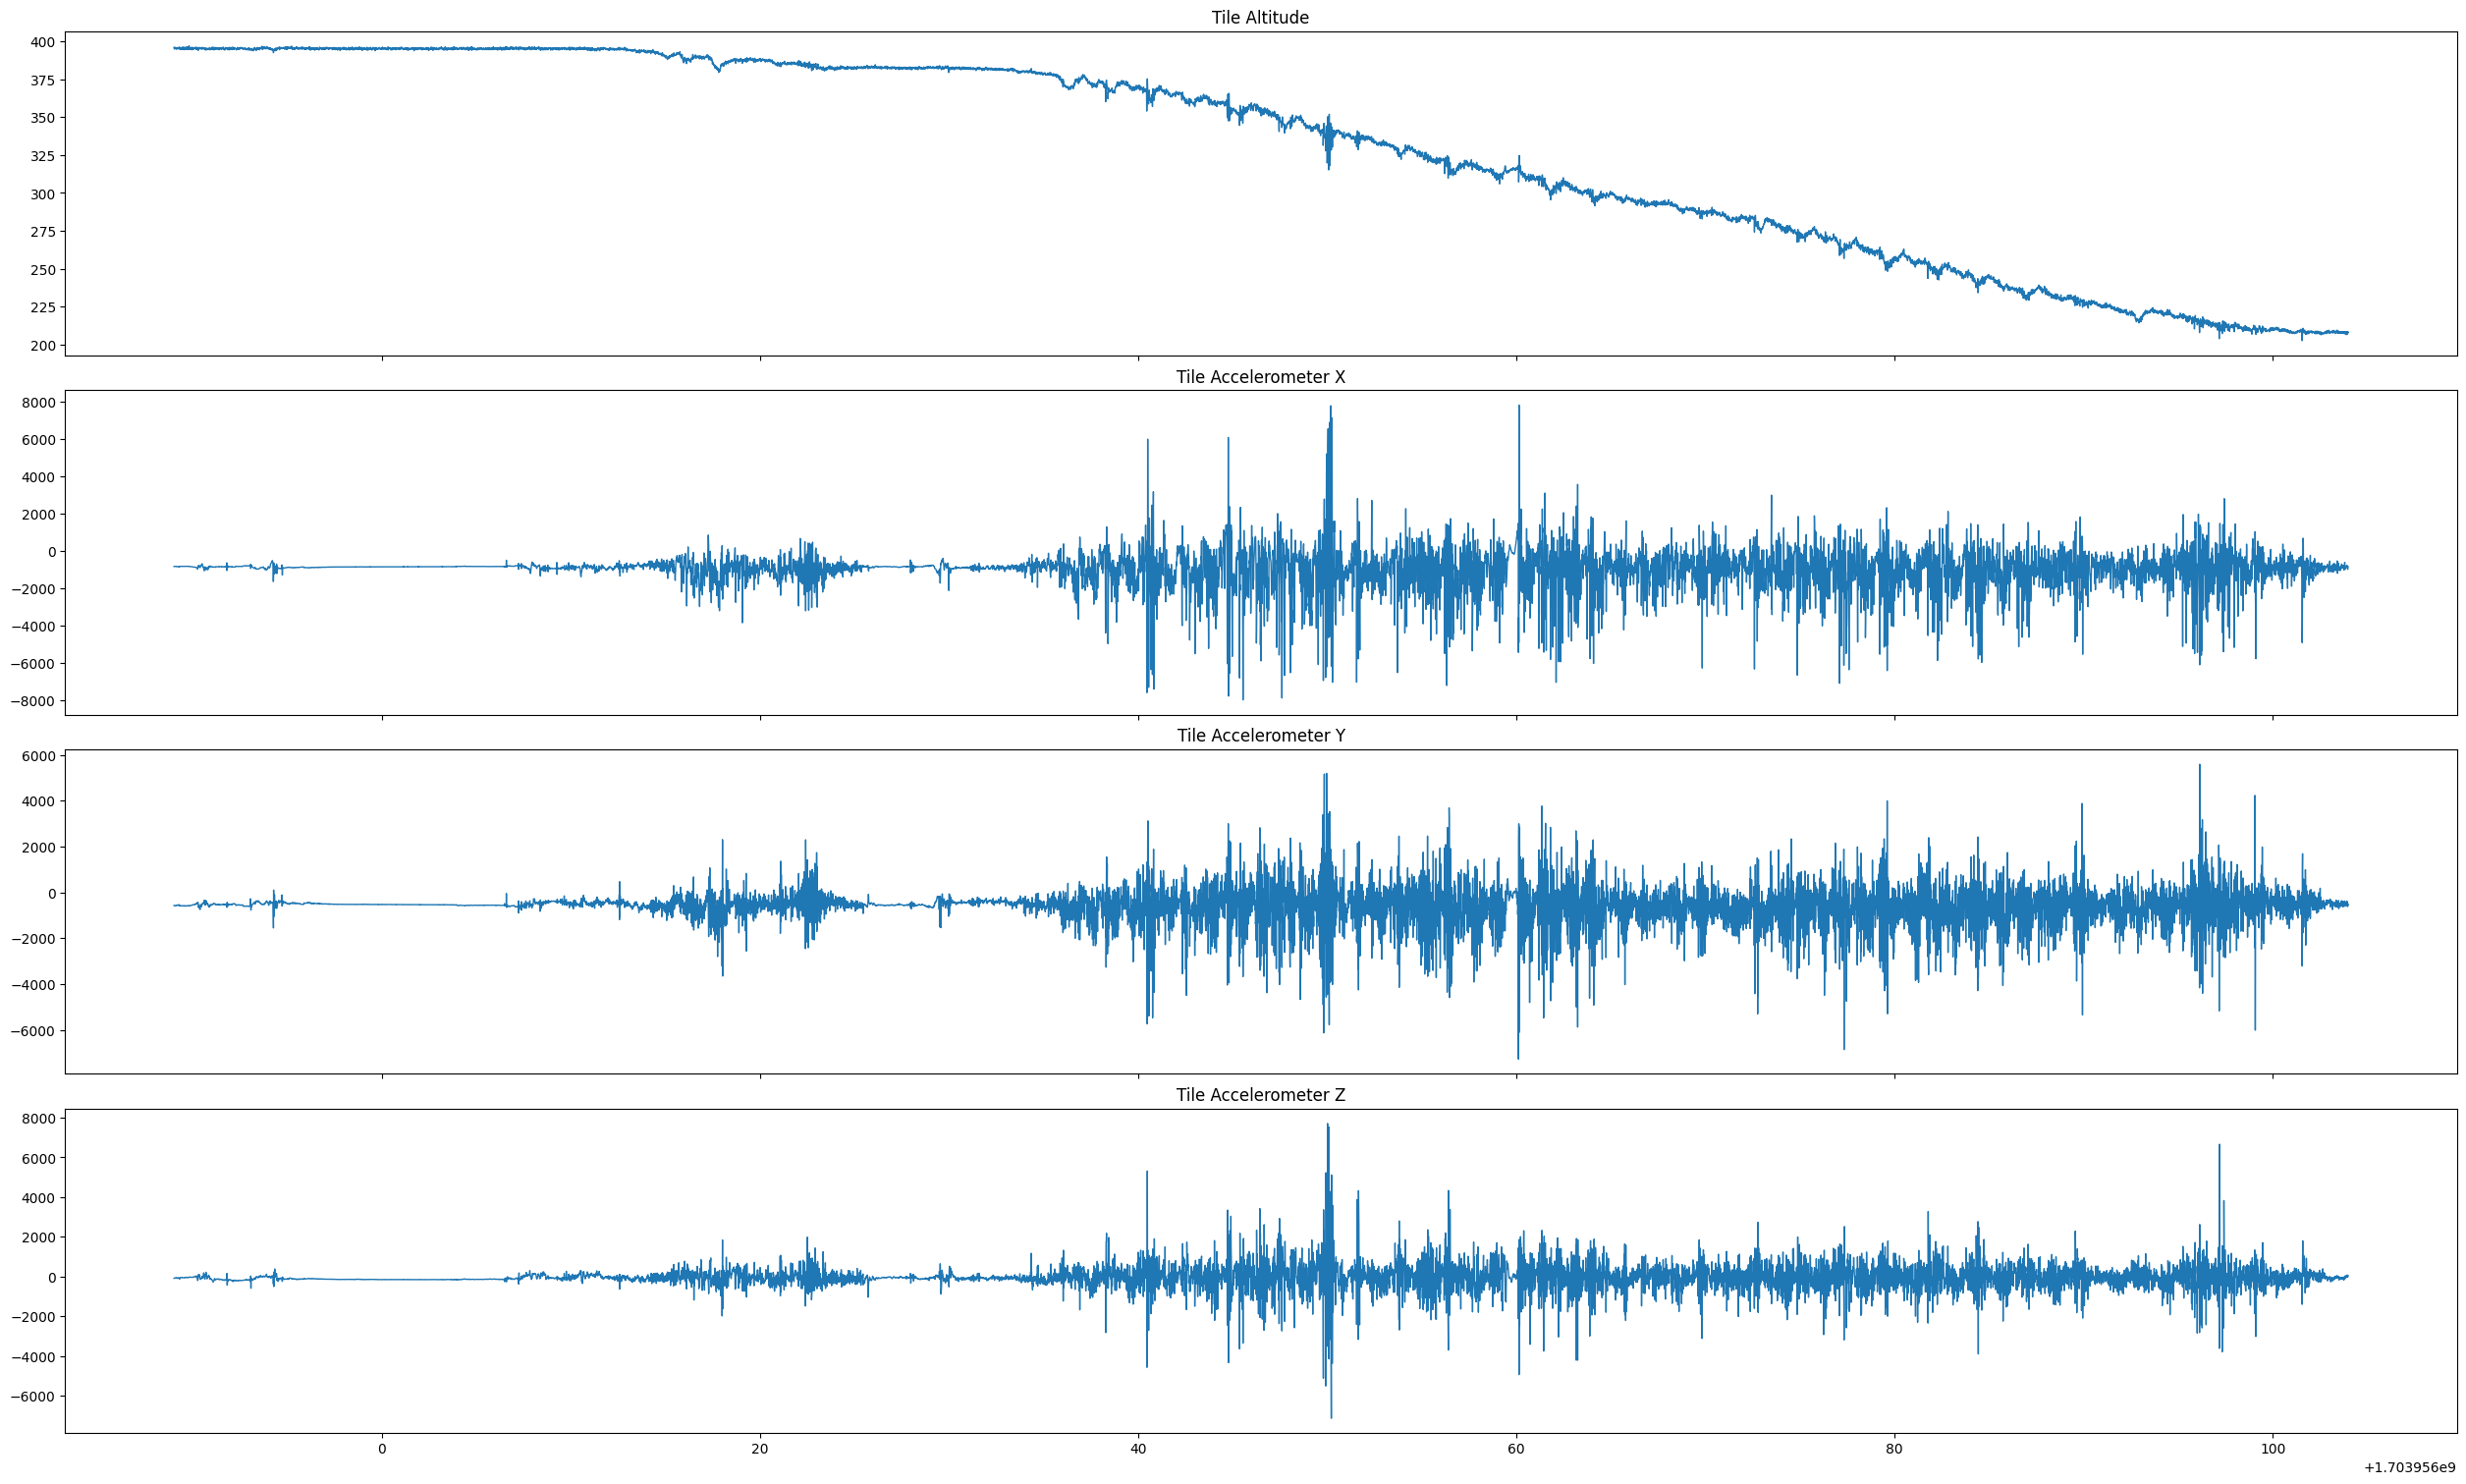

In [3]:
from plotting import plotAltAcc

_ = plotAltAcc(run1)

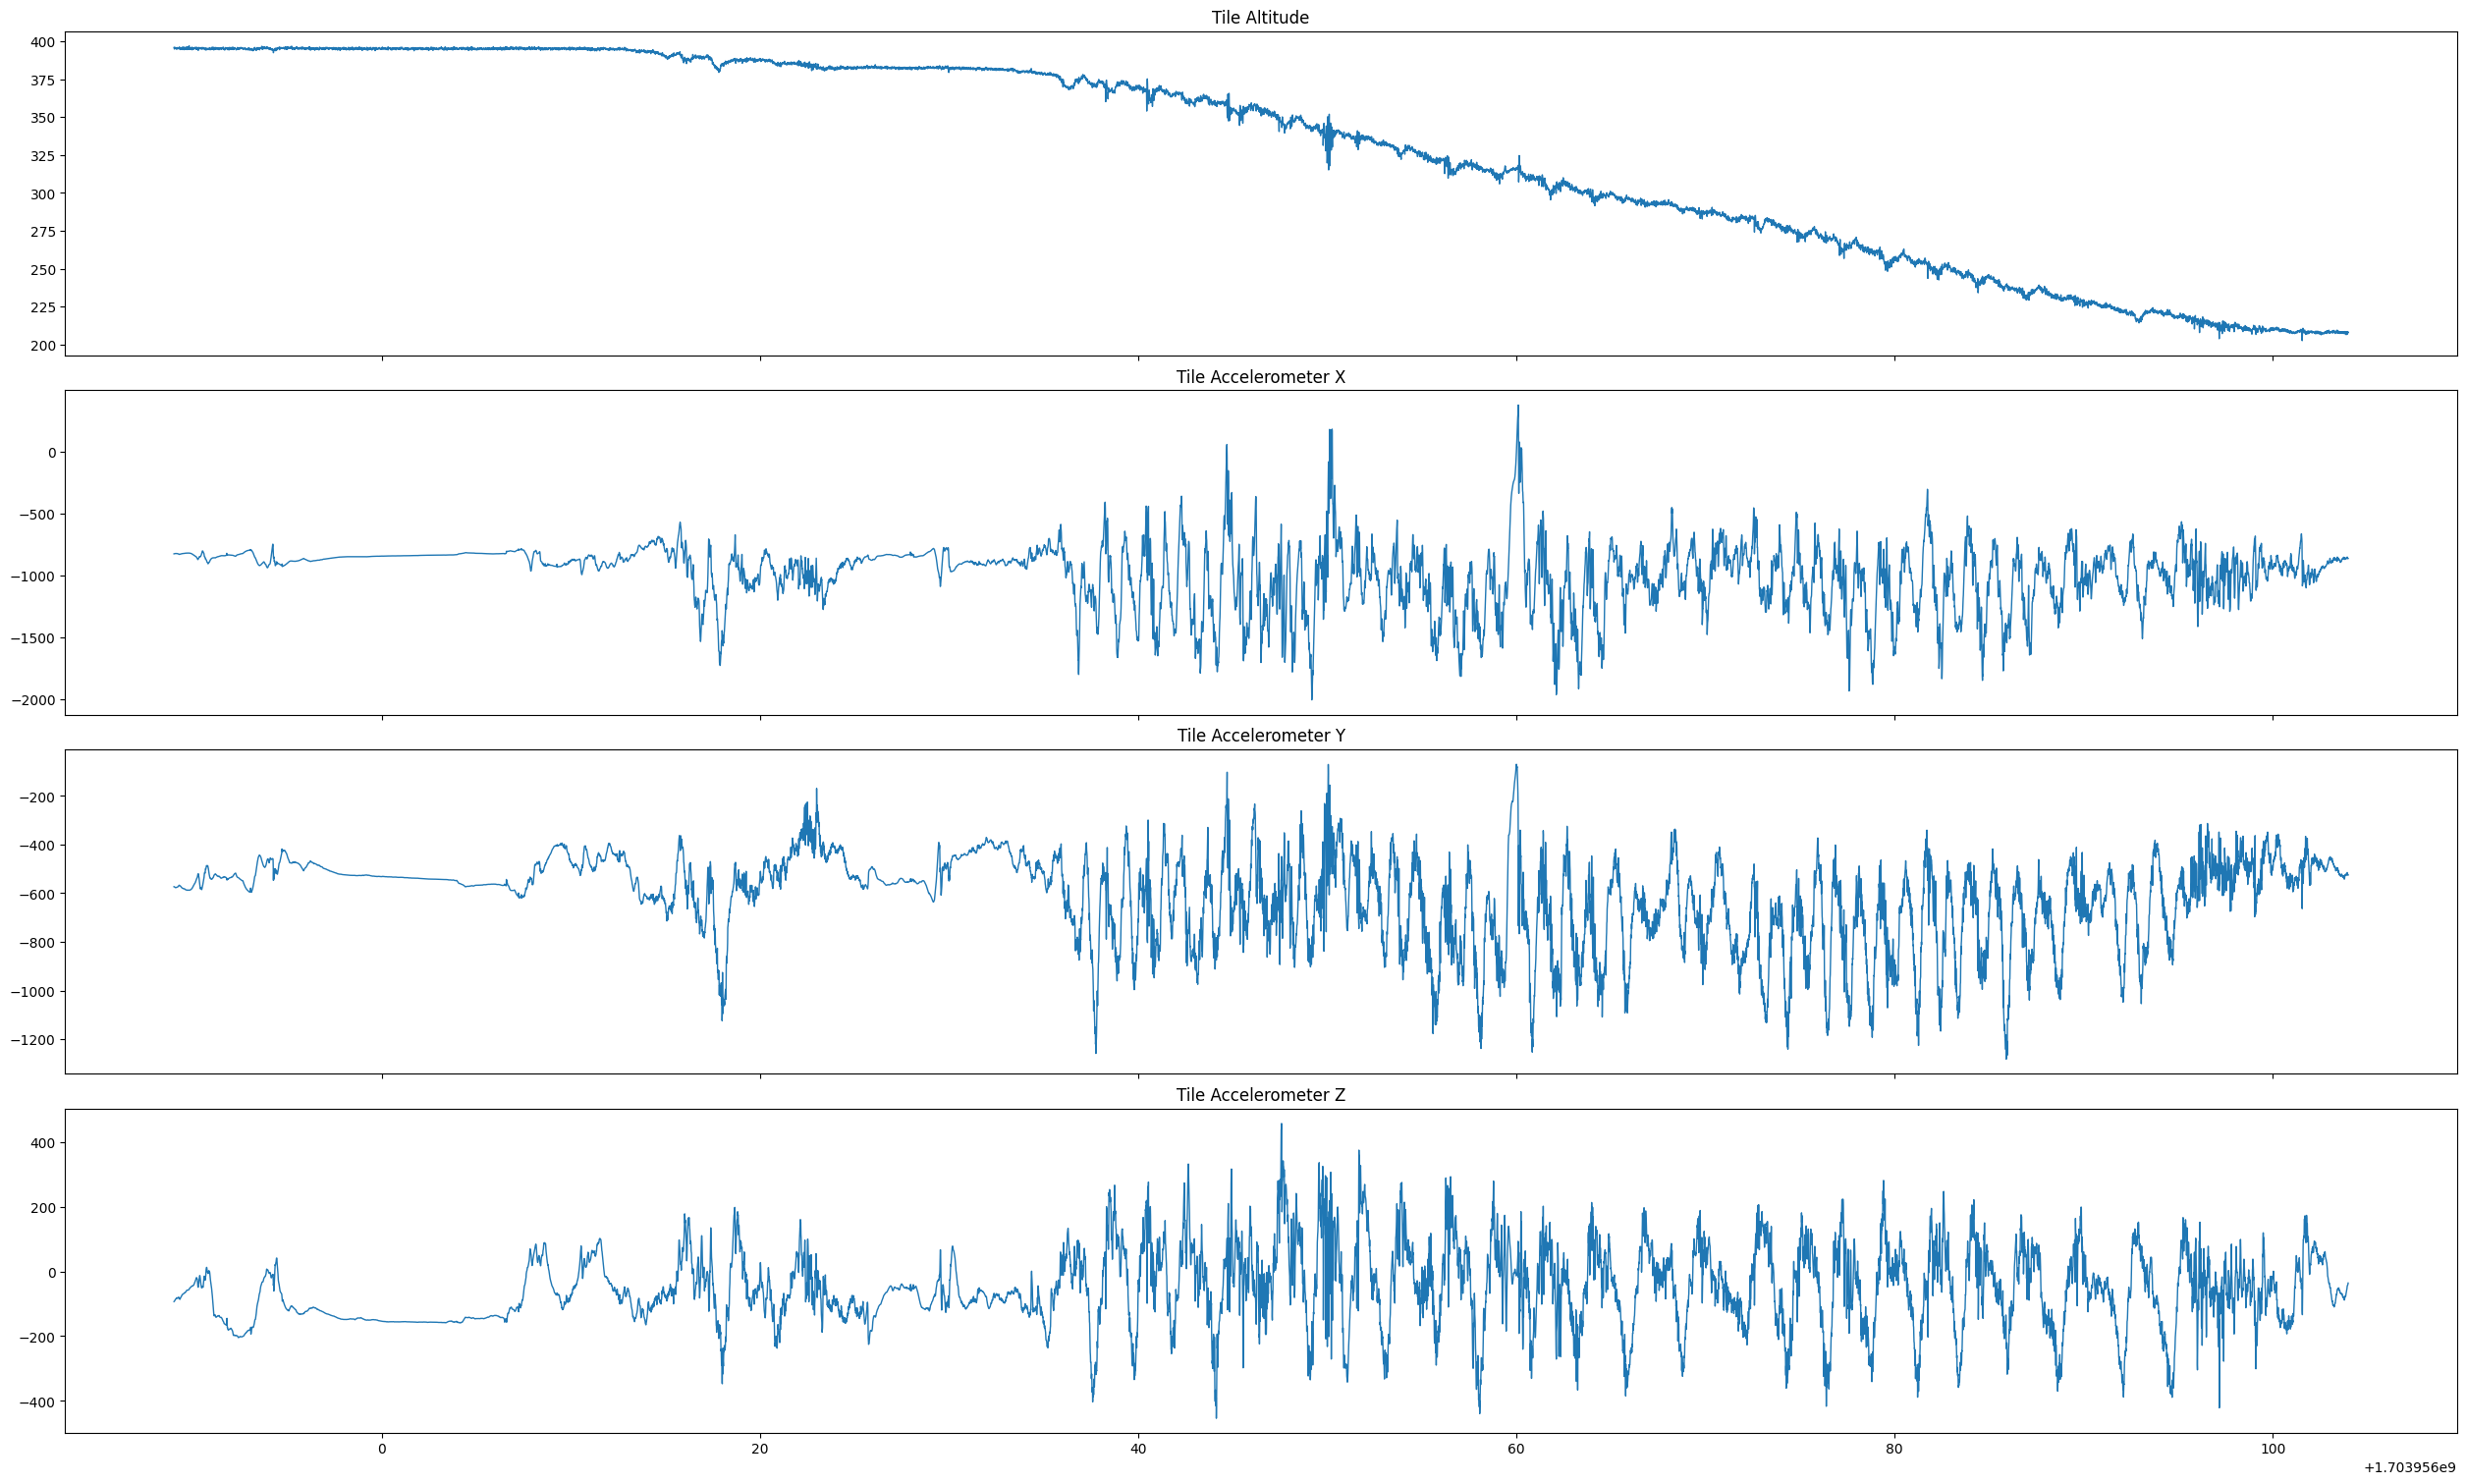

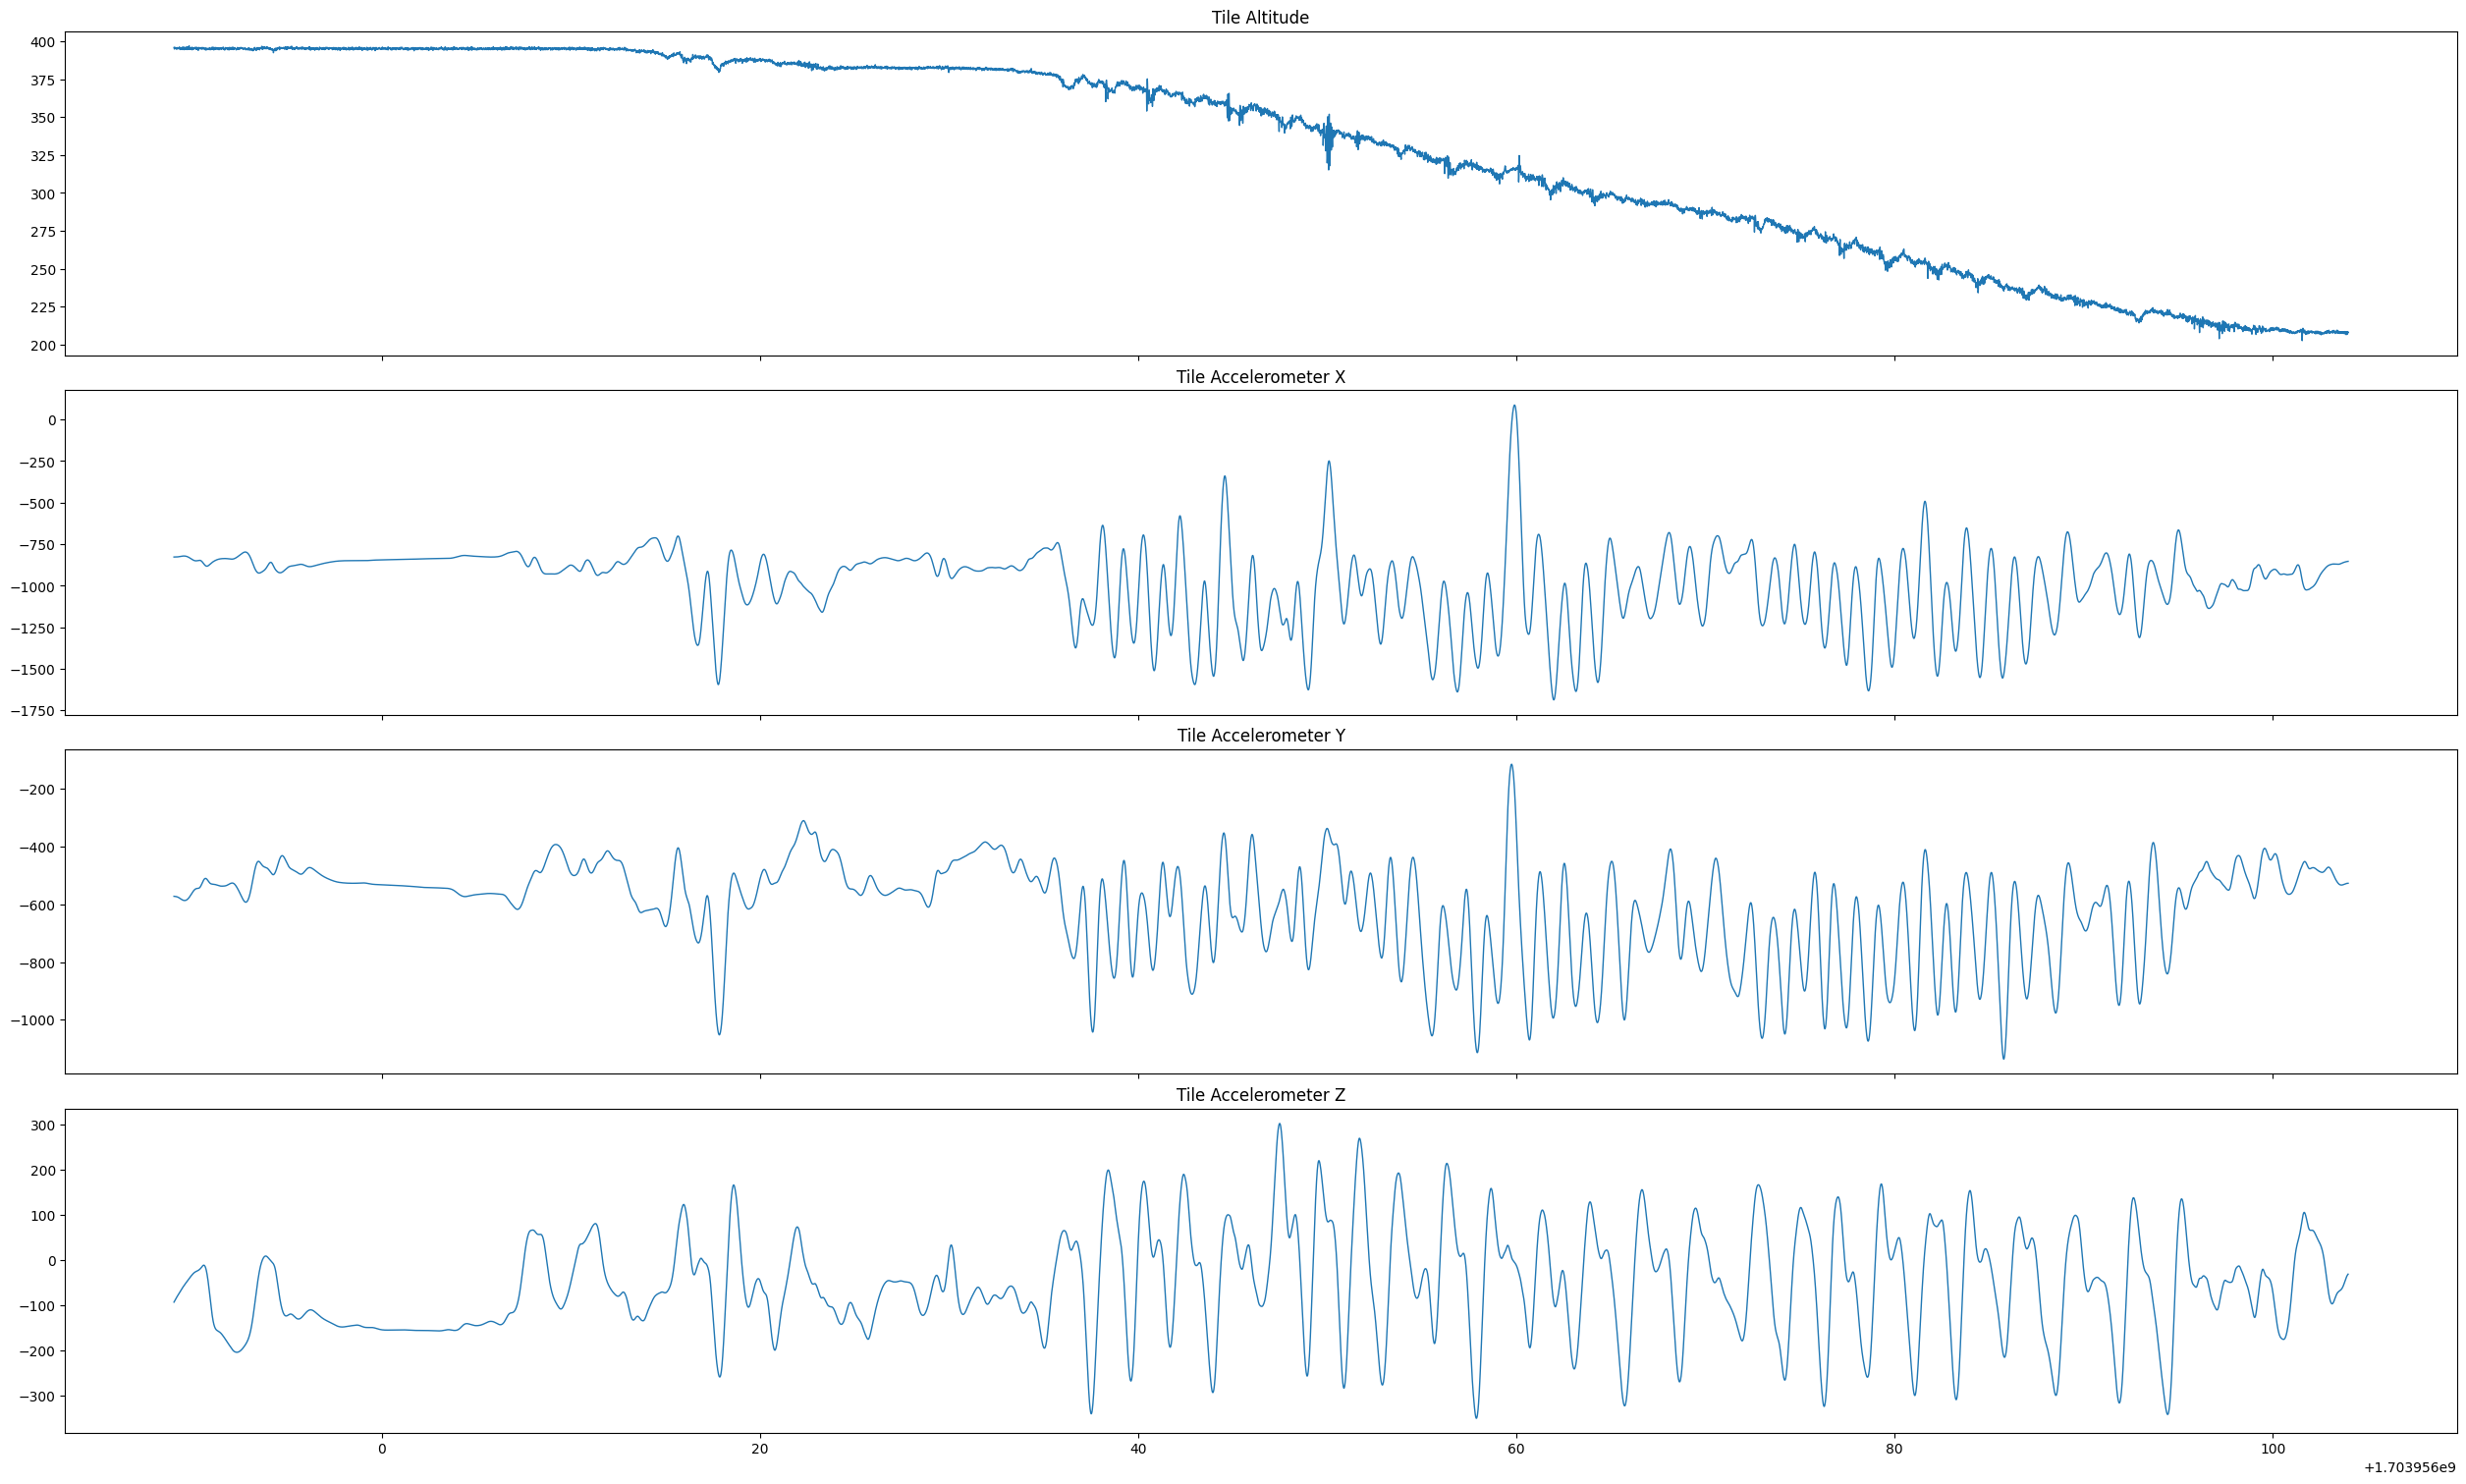

In [4]:
run1_ax_lpf = lowpass(run1.ax, 5/100, ftype='iir1')
run1_ay_lpf = lowpass(run1.ay, 5/100, ftype='iir1')
run1_az_lpf = lowpass(run1.az, 5/100, ftype='iir1')
_ = plotAltAcc(run1, run1_ax_lpf, run1_ay_lpf, run1_az_lpf)

run1_ax_lpf_b = lowpass(run1.ax, 2/100, ftype='butter2')
run1_ay_lpf_b = lowpass(run1.ay, 2/100, ftype='butter2')
run1_az_lpf_b = lowpass(run1.az, 2/100, ftype='butter2')
_ = plotAltAcc(run1, run1_ax_lpf_b, run1_ay_lpf_b, run1_az_lpf_b)